# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
text_soup = soup(html, 'html.parser')


In [62]:
# Extract all rows of data
rows = text_soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [63]:
# Create an empty list
rowlist=[]
# Loop through the scraped data to create a list of rows
for row in rows:
    rowlist.append(row)
print(rowlist)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

In [15]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import pandas as pd
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [22]:
# Confirm DataFrame was created successfully
mars_df.columns=['Id', 'Terrestrial_code', 'Sol', 'Is','Month','Min_Temp','Pressure']
mars_df

,Id,Terrestrial_code,Sol,Is,Month,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [69]:
# Examine data type of each column
mars_df.dtypes

Id                           int64
Terrestrial_code    datetime64[ns]
Sol                          int64
Is                           int64
Month                        int64
Min_Temp                   float64
Pressure                   float64
dtype: object

In [71]:
# Change data types for data analysis
mars_df['Id']=mars_df['Id'].astype(int)
mars_df['Terrestrial_code']=pd.to_datetime(mars_df['Terrestrial_code'])
mars_df['Sol']=mars_df['Sol'].astype(int)
mars_df['Is']=mars_df['Is'].astype(int)
mars_df['Month']=mars_df['Month'].astype(int)
mars_df['Min_Temp']=mars_df['Min_Temp'].astype(float)
mars_df['Pressure']=mars_df['Pressure'].astype(float)

# Check data types again 
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                1867 non-null   int32         
 1   Terrestrial_code  1867 non-null   datetime64[ns]
 2   Sol               1867 non-null   int32         
 3   Is                1867 non-null   int32         
 4   Month             1867 non-null   int32         
 5   Min_Temp          1867 non-null   float64       
 6   Pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


In [72]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

Id                           int32
Terrestrial_code    datetime64[ns]
Sol                          int32
Is                           int32
Month                        int32
Min_Temp                   float64
Pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?
unique_months = mars_df['Terrestrial_code'].dt.month.unique()
num_months = len(unique_months)
num_months

12

In [75]:
# 2. How many Martian days' worth of data are there?
earliest_date =mars_df['Sol'].min()
latest_date = mars_df['Sol'].max()
num_days = mars_df['Sol'].nunique()
num_days

1867

In [87]:
# 3. What is the average low temperature by month?
monthly_min_temp = round(mars_df.groupby('Month')['Min_Temp'].mean(),0)

# calculate the average of the monthly minimum temperatures
avg_min_temp = round(monthly_min_temp.mean(),0)
print(monthly_min_temp)
print(avg_min_temp)

Month
1    -77.0
2    -80.0
3    -83.0
4    -83.0
5    -79.0
6    -75.0
7    -72.0
8    -68.0
9    -69.0
10   -72.0
11   -72.0
12   -74.0
Name: Min_Temp, dtype: float64
-75.0


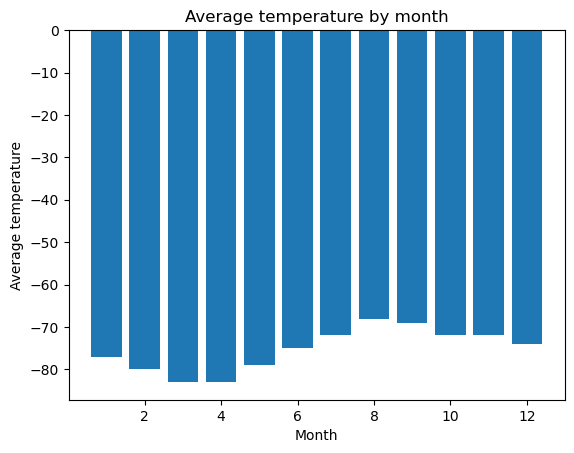

In [89]:
# Plot the average temperature by month
import matplotlib.pyplot as plt
monthly_avg_temp = round(mars_df.groupby('Month')['Min_Temp'].mean(),0)
plt.bar(monthly_avg_temp.index, monthly_avg_temp.values)

# set the x-axis label
plt.xlabel('Month')

# set the y-axis label
plt.ylabel('Average temperature')

# set the title of the plot
plt.title('Average temperature by month')

# display the plot
plt.show()

In [127]:
# Identify the coldest and hottest months in Curiosity's location
df_month_temp= pd.DataFrame(monthly_min_temp)
min_avg_temp = df_month_temp['Min_Temp'].min()
month_min_temp=df_month_temp.loc[df_month_temp['Min_Temp']==min_avg_temp]

month_min_temp

df_month_temp= pd.DataFrame(monthly_min_temp)
max_avg_temp = df_month_temp['Min_Temp'].max()
month_max_temp=df_month_temp.loc[df_month_temp['Min_Temp']==max_avg_temp]

month_max_temp


,Min_Temp
Month,
8,-68.0


In [135]:
# 4. Average pressure by Martian month
df_by_month=mars_df.groupby('Month')
df_month_pressure=df_by_month.mean().loc[:,['Pressure']]
df_month_pressure

C:\Users\maha3\AppData\Local\Temp\ipykernel_24396\1536349096.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month_pressure=df_by_month.mean().loc[:,['Pressure']]


,Pressure
Month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


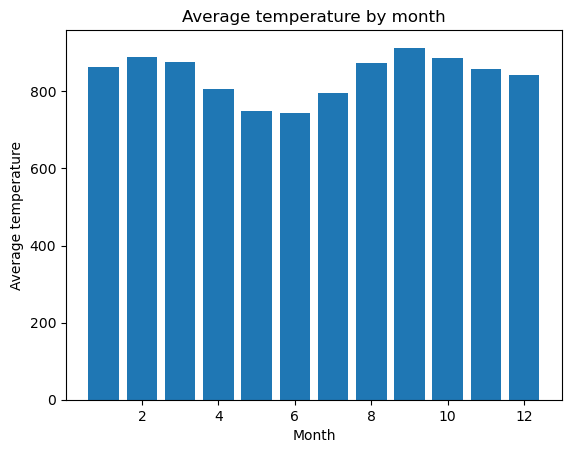

In [140]:
# Plot the average pressure by month
x=range(1,13)
plt.bar(x, df_month_pressure['Pressure'])

# set the x-axis label
plt.xlabel('Month')

# set the y-axis label
plt.ylabel('Average temperature')

# set the title of the plot
plt.title('Average temperature by month')

# display the plot
plt.show()

In [151]:
# 5. How many terrestrial (earth) days are there in a Martian year?
sun_lng=mars_df['Is'].loc[0]
martial_lng=mars_df.loc[mars_df['Is']==sun_lng]
martial_year=martial_lng['Terrestrial_code'].iloc[1]-martial_lng['Terrestrial_code'].loc[0]
martial_year

Timedelta('686 days 00:00:00')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [144]:
# Write the data to a CSV
mars_df.to_csv('mars_table.csv',index=False)

In [ ]:
browser.quit()